## 05-03 DAG/MapReduce

In [1]:
import dask
import dask.dataframe as dd

In [2]:
# # Boston Housing Dataset read and settings
dask_df = dd.read_csv("../data/boston/HousingData.csv")
dask_df = dask_df.persist()

In [3]:
dask_df_new            = dask_df.copy()
dask_df_new['SAFE']    = dask_df_new['CRIM']<=180
dask_df_new['RM/MEDV'] = dask_df_new['RM']/dask_df_new['MEDV'] * 100
dask_df_new = dask_df_new.dropna()

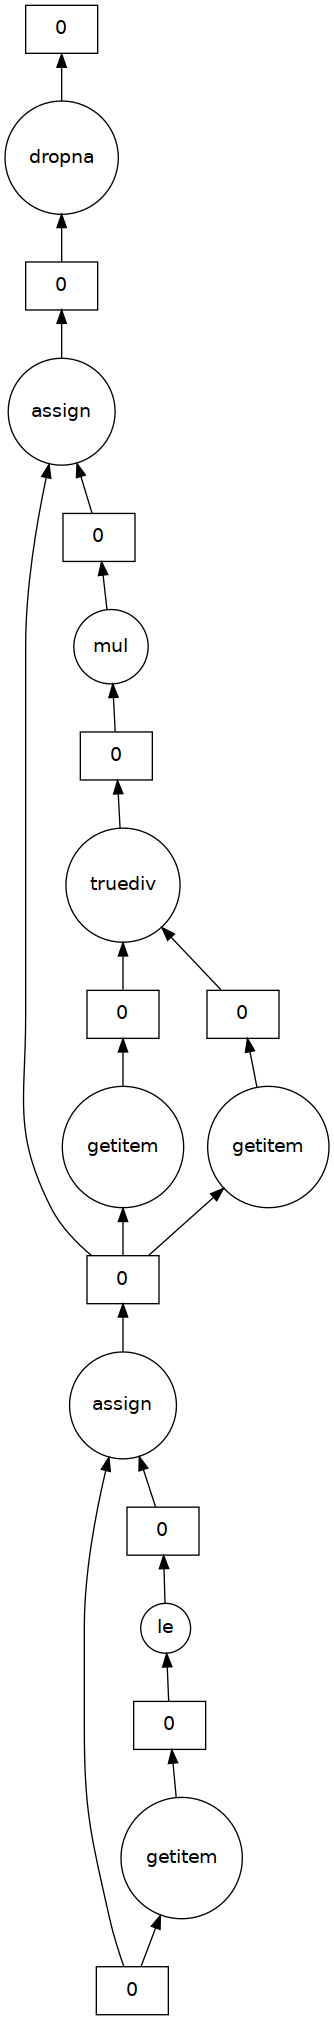

In [4]:
dask_df_new.visualize()

In [5]:
safe_col      = dask_df['CRIM']<=180
safe_col.name = 'SAFE'
cost_col      = dask_df['RM']/dask_df['MEDV'] * 100
cost_col.name = 'RM/MEDV'
dask_df_new = dd.concat([dask_df,safe_col, cost_col], axis=1)
dask_df_new = dask_df_new.dropna()

/home/cvmi_jeyoung/anaconda3/envs/rapids/lib/python3.9/site-packages/dask/dataframe/multi.py:1297: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(


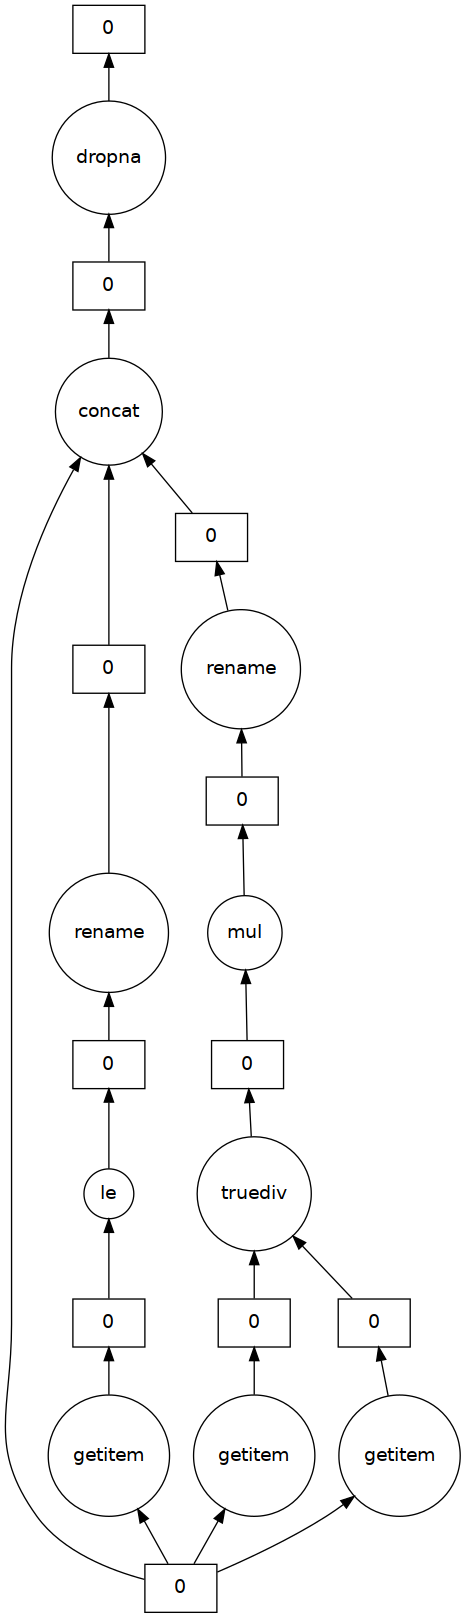

In [6]:
dask_df_new.visualize()